## Материалы
https://disk.yandex.ru/i/wmYg8NaLSnb_Fw 

## Описание проекта

В рамках проекта предстоит выяснить какие из доступных показателей характеризуют клиентов, принявших решение, закончить свои взаимоотношения с банком "Метанпромбанк". Мы попытаемся определить, есть ли какие-то паттерны в данных у клиентов покидающих банк. Для этого, проанализируем данные в разрезе двух групп по признаку оттока и решим задачу кластеризации.

__Проект состоит из нескольких этапов:__
- __Загрузка и предобработка данных.__
    - Обзор данных
    - Приведение данных к единому стилю
    - Проверка типов данных
    - Проверка на наличие пропусков и дубликатов
    - Обработка пропусков и дубликатов. Посмотрим на природу возникновения пропусков и дубликатов, попробуем найти способы восстановления пропущенных значений
- __Исследовательский анализ данных.__
    - Анализ распределения значений переменных. Посмотрим как распределены значения переменных в данных, для этого построим визуализацию распределений
    - Посмотрим на описательные статистики переменных (среднее, медианна).
    - Построим матрицу корреляций. По матрице мы сможем проверить наличие зависимостей между переменными.
    - На основе исследования переменных, выделим несколько признаков для дальнейшей сегментации клиентов по количеству продуктов
    - Исследование оттока в разрезе признаков и\или их диапазонов
- __Проверка гипотез.__
    - В этом блоке построим доверительные интервалы по выделенным признакам сегментации
    - Формирование выборок
    - Формулировки гипотез, выбор и обоснование статистического теста
    - Проверка гипотезы и интерпретация результата
- __Промежуточный итог__
    - Краткий итог по проделанной работе. Описание потенциальных признаков для сегментации и их взаимосвязей.
- __Кластеризация на основе выделенных признаков.__
    - Сформируем несколько кластеров пользователей
    - Определим какие признаки характерны для кластеров
    - На основе ключевых показателей выделим несколько наиболее приоритетных
- __Выводы и рекомендации для заказчика.__
    - Это финальный блок в котором, будут подведены глобальные выводы по признакам наиболее влияющим на отток пользователей на основе составленной сегментации. Будут даны рекомендации по дальнейшим действиям для предотвращения оттока
- __Формирование конечного результата.__
   - Составление презентации и дашборда по результатам проведенного теста

__Описание данных__

- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

In [1]:
! pip install phik

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
from scipy import stats as st
import phik
import plotly.express as px
from plotly.subplots import make_subplots
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score

In [3]:
wr.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

### Загрузка и предобработка данных 

In [4]:
def data_proc (data):
    """
    Функция будет выводить информацию о явных дубликатах
    и пропусков в данных 
    """
    duplicated_sum = data.duplicated().sum()
    gap_sum = data.isna().sum()
    print(data.info())
    print()
    print('Количество явных дубликатов:', duplicated_sum)
    print('Количество пропусков:')
    print(gap_sum)
    

In [5]:
try:
    df = pd.read_csv('C:/Users/crugl/Documents/Проекты/bank_scrooge.csv')
except:
    df = pd.read_csv('/datasets/bank_scrooge.csv')  

In [6]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


In [7]:
data_proc(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None

Количество явных дубликатов: 0
Количество пропусков:
USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295

Приведём названия столбцов к общему виду и обработаем пропуски в столбцах balance и age

In [8]:
df.columns = [name.replace('ID', '_id') for name in df.columns]
df.columns = df.columns.str.lower()

__age__

In [9]:
df.loc[df['age'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.00,Ярославль,М,NaN,5,"7,601,719.20",2,1,1,"408,121.16",0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"160,368.82",0
2444,221156,913.00,Ярославль,М,NaN,0,NaN,1,1,1,"135,693.24",0
3091,138660,836.00,Ростов,Ж,NaN,5,"294,315.53",2,0,1,"63,310.22",1
4912,210674,834.00,Рыбинск,М,NaN,1,"238,330.52",2,0,1,"93,775.06",0
5470,218868,827.00,Рыбинск,Ж,NaN,4,"448,959.07",2,1,1,"67,835.95",0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"137,500.77",0
7236,210135,908.00,Рыбинск,Ж,NaN,4,"1,120,340.31",3,1,1,"85,002.15",0
7248,219343,920.00,Рыбинск,Ж,NaN,0,NaN,1,1,0,"159,248.67",0
7345,184913,829.00,Ярославль,Ж,NaN,3,"188,648.77",2,0,1,"75,206.90",0


Вижу 3 варианта, как можно обработать пропущенные значения:
- Проверить есть ли дублирующиеся записи по полю user_id и city. Идея в том, чтобы посмотреть, есть ли в одном городе клиенты с одинаковым user_id. Если такие есть, то можно предположить, что имеет место ошибка при вводе данных, например для одного и того же клиента заводилось две карточки, одна с одним продуктом, а другая с другим.
- Заполнить синтетическими значениями, например средним или медианой. 
- Удалить строки с пропусками, их менее 1% от общего количества данных, поэтому этот вариант тоже можно рассматривать

In [10]:
user_list = df.loc[df['user_id'].duplicated() & df['age'].isna()]['user_id']

In [11]:
df.query('user_id in @user_list').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8785,127440,663.00,Ярославль,М,NaN,0,NaN,1,1,1,"117,197.56",0
4443,127440,846.00,Рыбинск,М,66.00,1,"57,405.67",2,0,1,"17,831.63",0
9819,140934,832.00,Рыбинск,Ж,NaN,3,"385,763.16",2,0,1,"59,651.35",0
4212,140934,919.00,Ярославль,Ж,29.00,4,"603,946.18",3,0,1,"158,438.79",0
4343,141945,929.00,Рыбинск,М,33.00,0,NaN,1,1,0,"381,868.89",0
9457,141945,929.00,Ярославль,М,NaN,0,NaN,1,1,0,"381,868.89",0
3683,151662,960.00,Ярославль,Ж,37.00,4,"2,527,032.70",4,1,0,"231,648.50",0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,"137,500.77",0
6670,163657,903.00,Рыбинск,М,45.00,4,"1,343,339.70",4,0,1,"83,741.65",0
9667,163657,849.00,Ярославль,М,NaN,4,"1,254,013.85",2,1,1,"119,106.67",0


Просмотрев данные, можно сделать вывод о том, что дублирующиеся user_id находятся в разных городах и нет оснований, чтобы связать их между собой.

Остается два варианта, либо заполнять средними синтетическими данными, либо удалять.
Можно заполнить возраст средним значениям в зависимости от наличия кредитной карты. Выбор именно такого подхода можно объяснить тем, что для получения кредитной карты, банк выставляет определенные условия по доходу и прочим параметра. Не каждый 18-ти летний молодой человек может получить кредитную карту.

In [12]:
for i in df['credit_card'].unique():
    df.loc[(df['credit_card'] == i) & (df['age'].isna()), 'age'] = \
    df.loc[(df['credit_card'] == i), 'age'].mean()

__balance__

Есть несколько предположений
1. Пропуски связаны с количеством продуктов. Мы не знаем баланс какого именно счёта отражает столбец balance. Если, например, в столбце balance отображается баланс расчётного счёта, то у людей открывших депозит в банке, могут быть пропуски в этом столбце.
2. Возможно есть какая-то географическая зависимость, например, в офисах какого-то города был сбой.
3. Пропуски в balance означают нулевой баланс.



Начнём со сравнения количества продуктов среди тех клиентов у кого есть пропуски в balance и остальных

In [13]:
balance = df.dropna(subset=['balance'])

In [14]:
nan_balance = df.loc[df['balance'].isna()]
nan_balance.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,"238,055.53",0
10,148929,927.00,Ростов,М,52.00,0,NaN,1,1,1,"196,820.07",0
11,172184,921.00,Ростов,М,41.00,0,NaN,1,1,1,"217,469.48",0
19,127034,922.00,Рыбинск,Ж,53.00,0,NaN,1,0,0,"147,094.82",0


In [15]:
balance.groupby('products')['user_id'].count()

products
1    1391
2    4811
3    1010
4     474
5      19
Name: user_id, dtype: int64

In [16]:
nan_balance.groupby('products')['user_id'].count()

products
0       1
1    1950
2     315
3      29
Name: user_id, dtype: int64

На основе полученных данных нельзя утверждать, что отсутствие значений в поле balance как-то связано с количеством продуктов клиентов. 

Теперь посмотрим на разбивку по наличию кредитных карт.

In [17]:
balance.groupby('credit_card')['user_id'].count()

credit_card
0    2773
1    4932
Name: user_id, dtype: int64

In [18]:
nan_balance.groupby('credit_card')['user_id'].count()

credit_card
0     423
1    1872
Name: user_id, dtype: int64

Сутауция аналогично, нельзя утверждать пропущенные значения как-то связаны с наличием кредитных карт.

Посмотрим есть ли клиенты с нулевым балансом

In [19]:
df.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.00,Ярославль,М,18.00,0,0.00,2,1,1,"64,548.33",0
6757,148456,813.00,Ярославль,М,20.00,2,0.00,2,1,0,"23,876.51",0


Два клиента с нулевым балансом присутствуют в данных, значит пропущенные значения не могут интерпретироваться как нулевой баланс.

Так как пропусков достаточно много, удалять их нецелесообразно, мы можем потерять большое количество нужных нам для дальнейшего исследования данных. Пропуски оставляем.

Теперь посмотрим есть ли в наших данных аномальные значения

In [20]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"10,000.00","10,000.00","10,000.00","10,000.00","7,705.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"171,814.71",848.70,42.73,2.63,"827,794.31",1.87,0.68,0.52,"147,866.89",0.18
std,"33,708.24",65.45,12.16,1.98,"1,980,614.15",0.79,0.47,0.50,"139,388.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,810.25",802.00,33.00,0.00,"295,554.16",1.00,0.00,0.00,"75,251.90",0.00
50%,"172,728.00",853.00,40.00,3.00,"524,272.20",2.00,1.00,1.00,"119,658.10",0.00
75%,"201,261.75",900.00,51.00,4.00,"980,705.85",2.00,1.00,1.00,"174,500.54",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


В столбцах balance и est_salary есть аномальные значения. Избавимся от них, отрежем по 1% данных.

In [21]:
np.percentile(df['est_salary'], [90, 95, 99])

array([242395.782 , 316885.3445, 887903.8546])

In [22]:
np.percentile(balance['balance'], [1, 2, 5, 90, 95, 99]) 

array([  23267.4184,   47675.348 ,  100104.32  , 1460133.708 ,
       2116704.784 , 4827443.494 ])

In [23]:
df = df.query('est_salary <= 888000 and 23000 <= balance <= 482000')

### Исследовательский анализ

Исследовательский анализ начнем с матрицы корреляций, оценим взаимосвязь между переменными.

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


Text(0.5, 1.0, 'Корреляционная матрица')

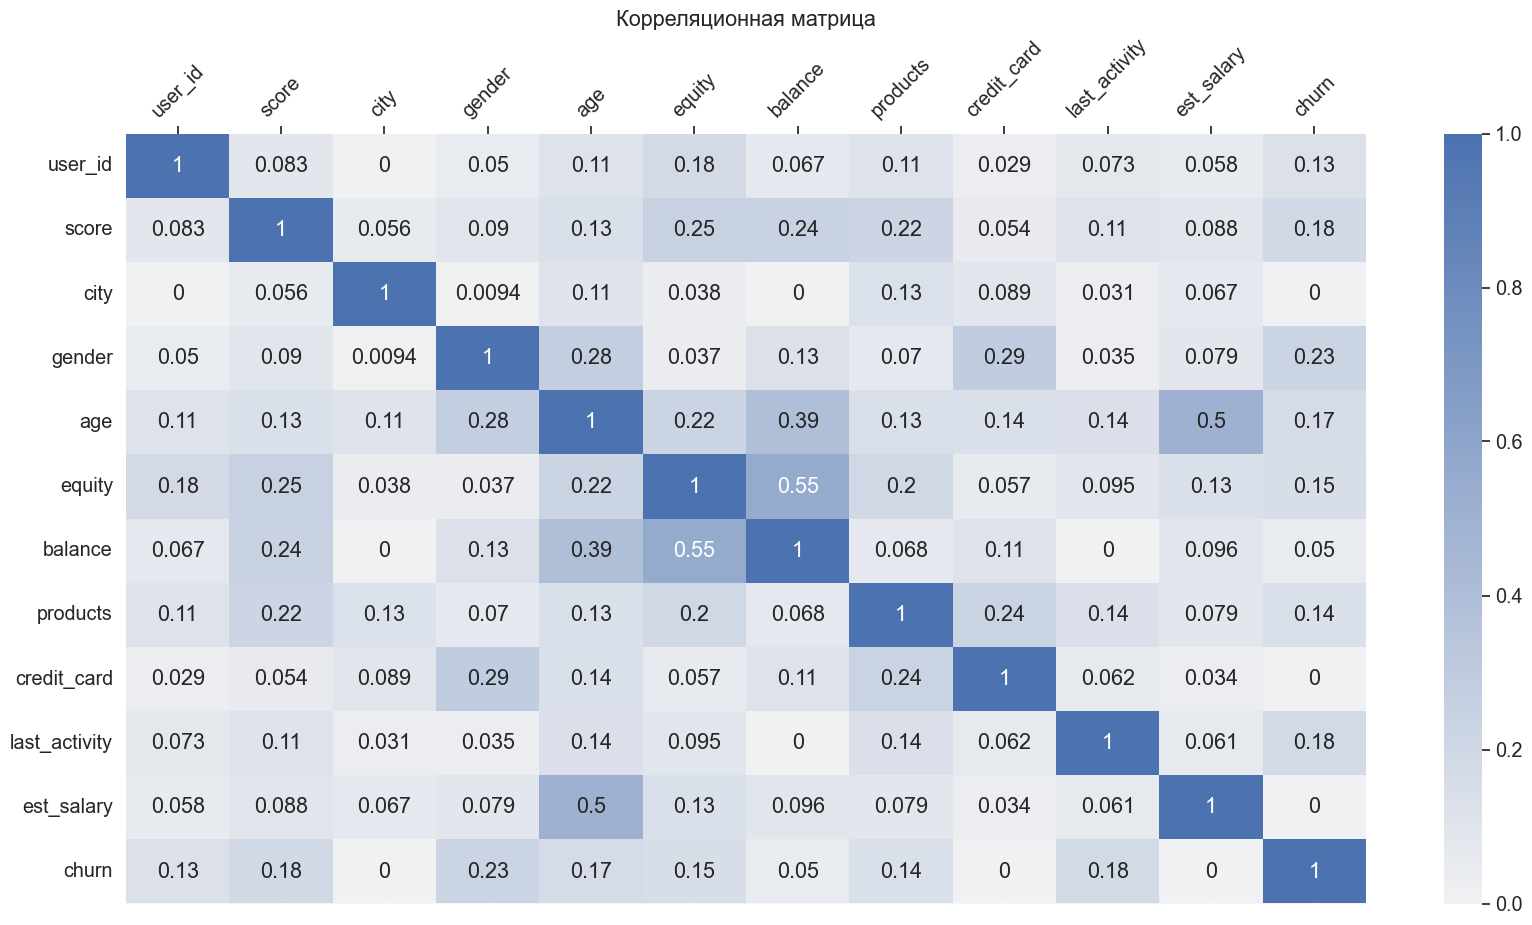

In [24]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale = 1.3)
ax = sns.heatmap(data=df.phik_matrix(), annot=True, cmap=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.title('Корреляционная матрица')

Каких-то ярковыраженных зависимостей между переменной churn и остальными не видно, интересно что наиболее тесная связь у переменной churn с gender

Исследовательский анализ будем проводить в разрезе двух подгрупп: пользователей, которые ушли или изъявили желание уйти и оставшихся пользователей.

Также мы разобьем изначальный датасет на два: с количественными переменными и качественными, для удобной визуализации.

In [25]:
def visual_quanti (column):
    """
    Функция визуализирует распределение данных
    """
    if column == 'churn':
        pass
    else:
        sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale = 1.3)
        ax1 = plt.subplot(1,2,1)
        sns.histplot(data=quanti_variables, x=quanti_variables[column], 
                     ax=ax1, hue=quanti_variables['churn'],multiple='dodge',
                     palette=['#4682B4', '#01939A'])#4682B4 #01939A
        plt.ylabel('Количество')
        plt.title(column)
        plt.xlabel('')

        ax2 = plt.subplot(1,2,2)
        sns.boxplot(data=quanti_variables, x=quanti_variables['churn'],
                    y=quanti_variables[column], ax=ax2, 
                    palette=['#4682B4', '#01939A'])#36BBCE #4682B4
        plt.ylabel('Количество')
        plt.title(column)
        plt.xlabel('')
        plt.show()

In [26]:
def stats (column):
    """
    Функция возвращает описательные статистики данных
    """
    if column =='churn':
        pass
    else:
        describe = quanti_variables[column].describe().T
        mode = st.mode(quanti_variables[column]).mode[0]
        mode_count = st.mode(quanti_variables[column]).count[0]
        mode_percent = mode_count/len(quanti_variables[column])
        print(describe)
        print()
        print('Мода столбца:', mode)
        print('Сколько раз в столбце встречается мода:', mode_count)
        print('Процент моды от данных в столбце:', '{:.2%}'.format(mode_percent))

In [27]:
def mean_med (column):
    """
    Функция возвращает описательные статистики данных
    """
    if column =='churn':
        pass
    else:
        mean_1 = quanti_variables.query('churn == 1')[column].mean()
        mean_0 = quanti_variables.query('churn == 0')[column].mean()
        median_1 = quanti_variables.query('churn == 1')[column].median()
        median_0 = quanti_variables.query('churn == 0')[column].median()
        print('Среднее значение по уходящим клиентам', mean_1)
        print('Медиана по уходящим клиентам', median_1)
        print()
        print('Среднее значение по остальным клиентам', mean_0)
        print('Медиана по остальным клиентам', median_0)

Начнём с количественных переменных

In [28]:
quanti_variables = df[['score', 'age', 'equity', 'balance', 'est_salary', 'products','churn']]
quanti_variables = (
                    quanti_variables
                    .rename(columns={'score':'Баллы кредитного скоринга', 
                                     'age':'Возраст', 'equity':'Количество баллов собственности', 
                                     'balance':'Баланс', 'products':'Количество продуктов клиента',
                                     'credit_card':'Наличие кредитной карты',
                                     'est_salary':'Оценочный доход клиента'} )
                   )

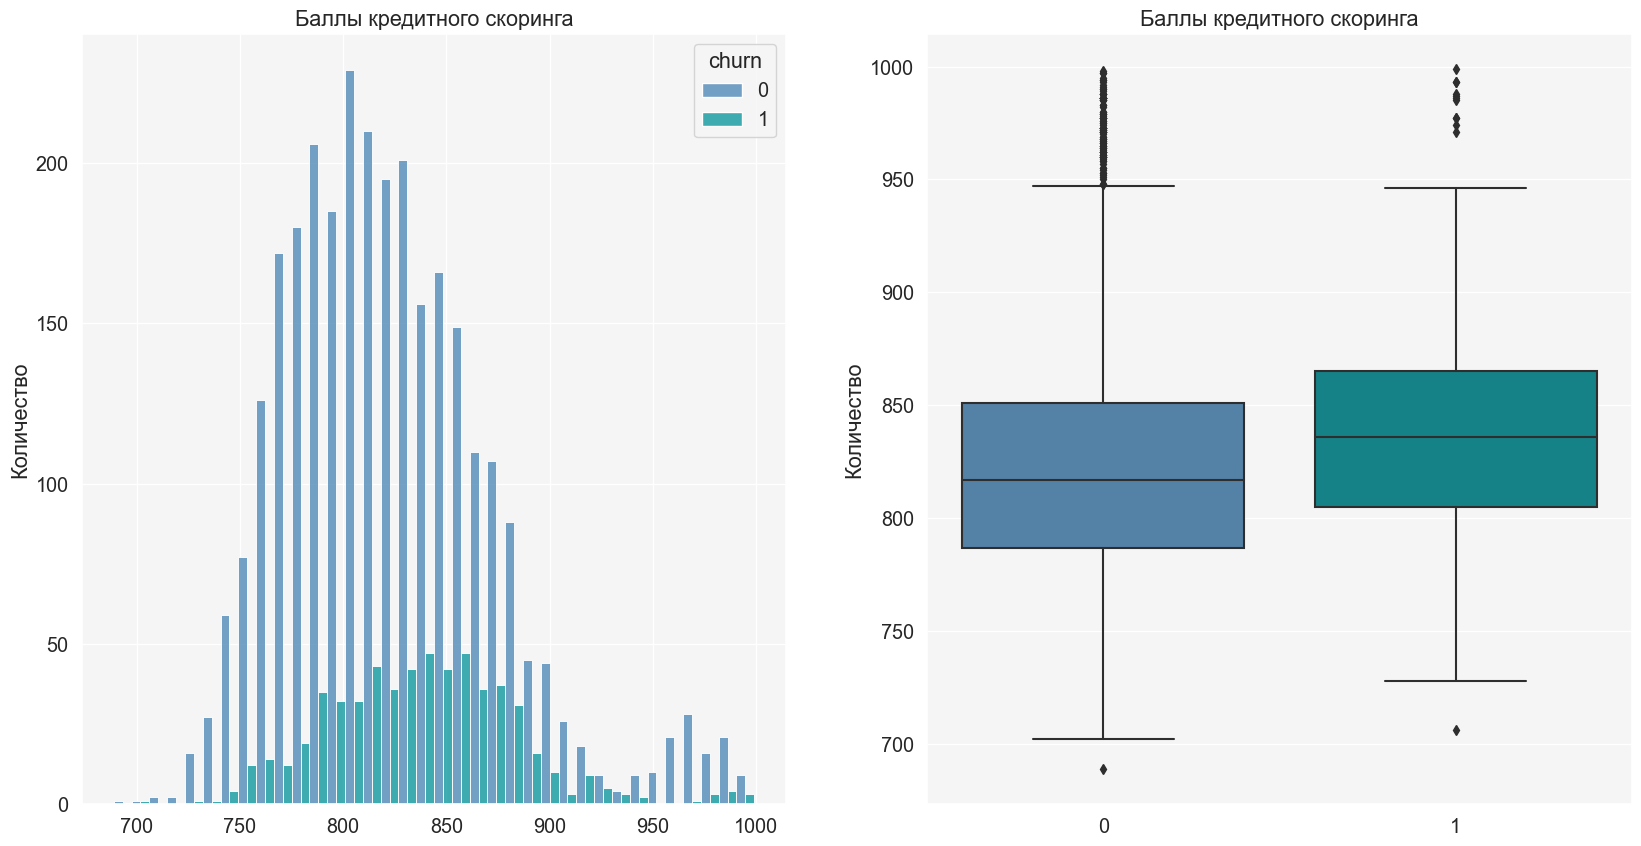

Среднее значение по уходящим клиентам 836.6792452830189
Медиана по уходящим клиентам 836.0

Среднее значение по остальным клиентам 823.0430769230769
Медиана по остальным клиентам 817.0


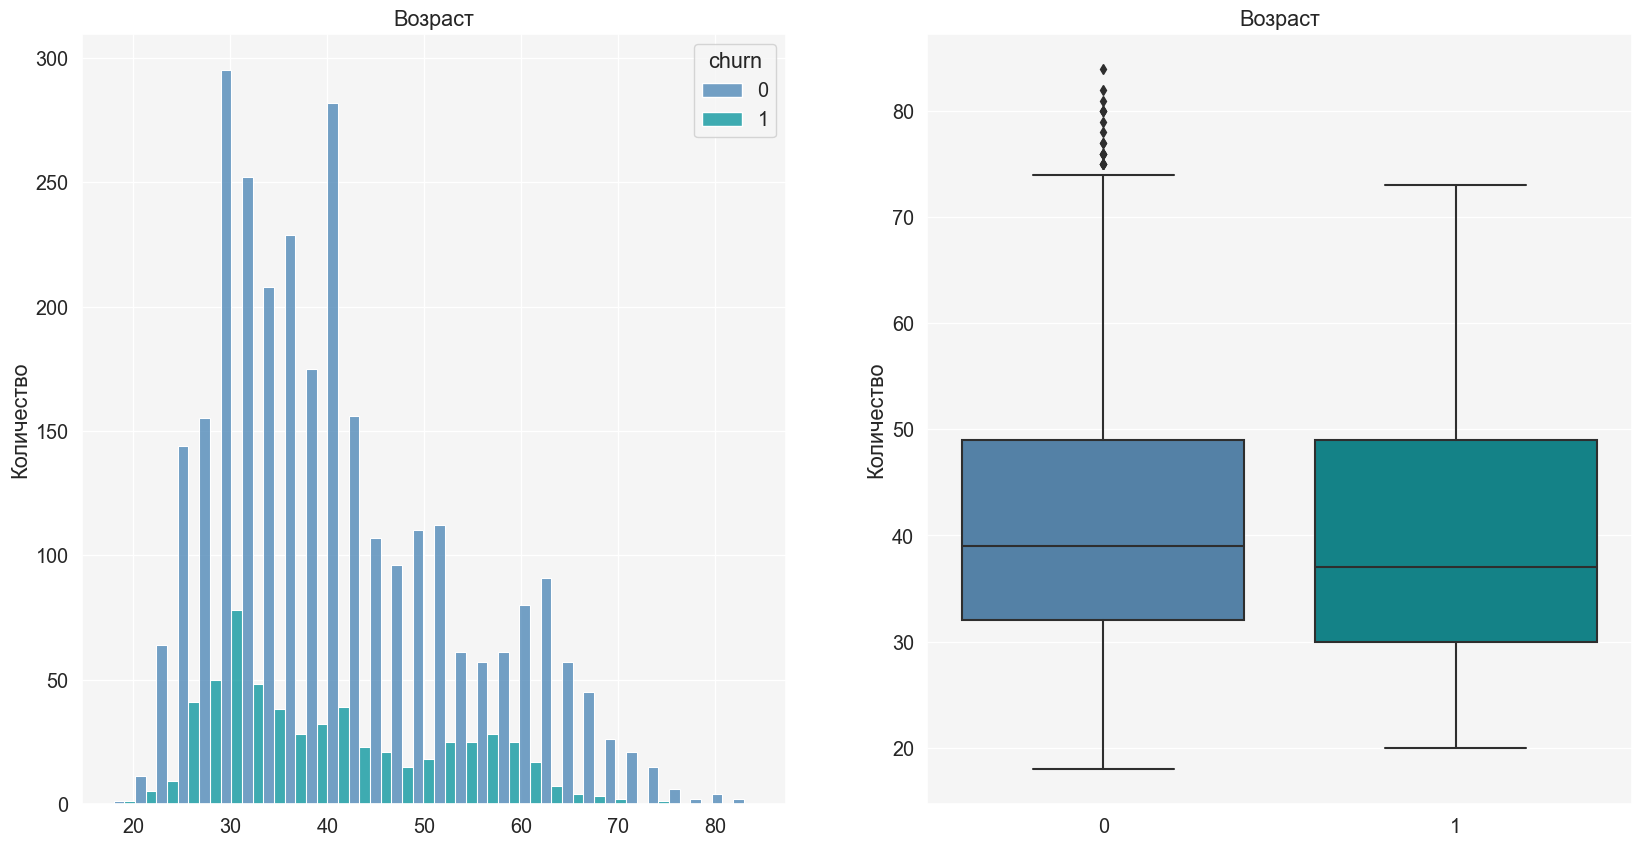

Среднее значение по уходящим клиентам 39.81804685525629
Медиана по уходящим клиентам 37.0

Среднее значение по остальным клиентам 41.39629952002382
Медиана по остальным клиентам 39.0


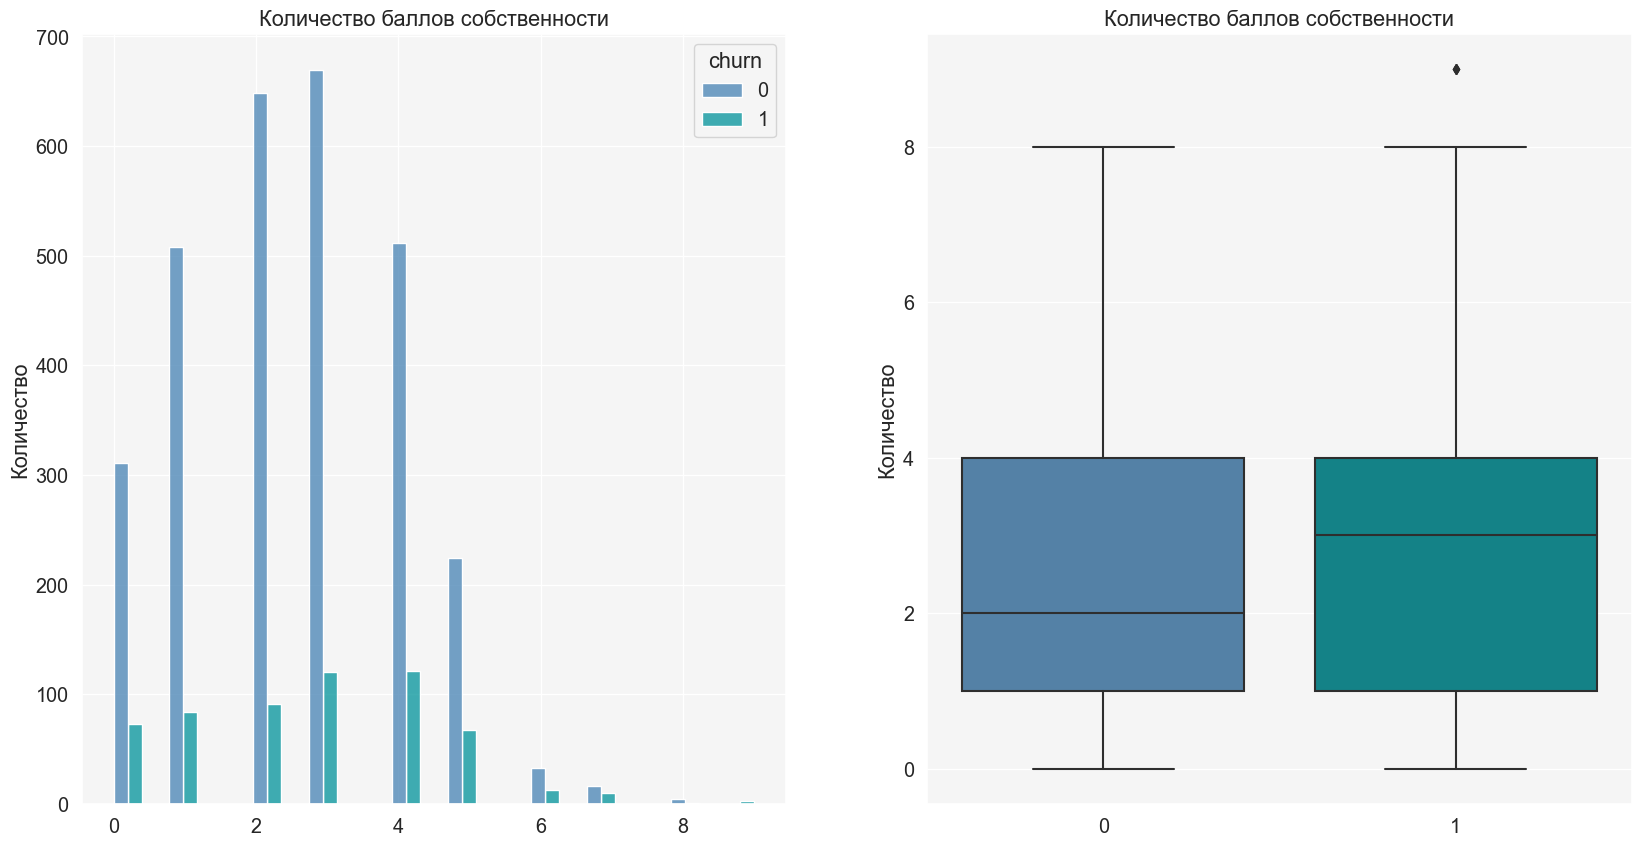

Среднее значение по уходящим клиентам 2.792452830188679
Медиана по уходящим клиентам 3.0

Среднее значение по остальным клиентам 2.502905982905983
Медиана по остальным клиентам 2.0


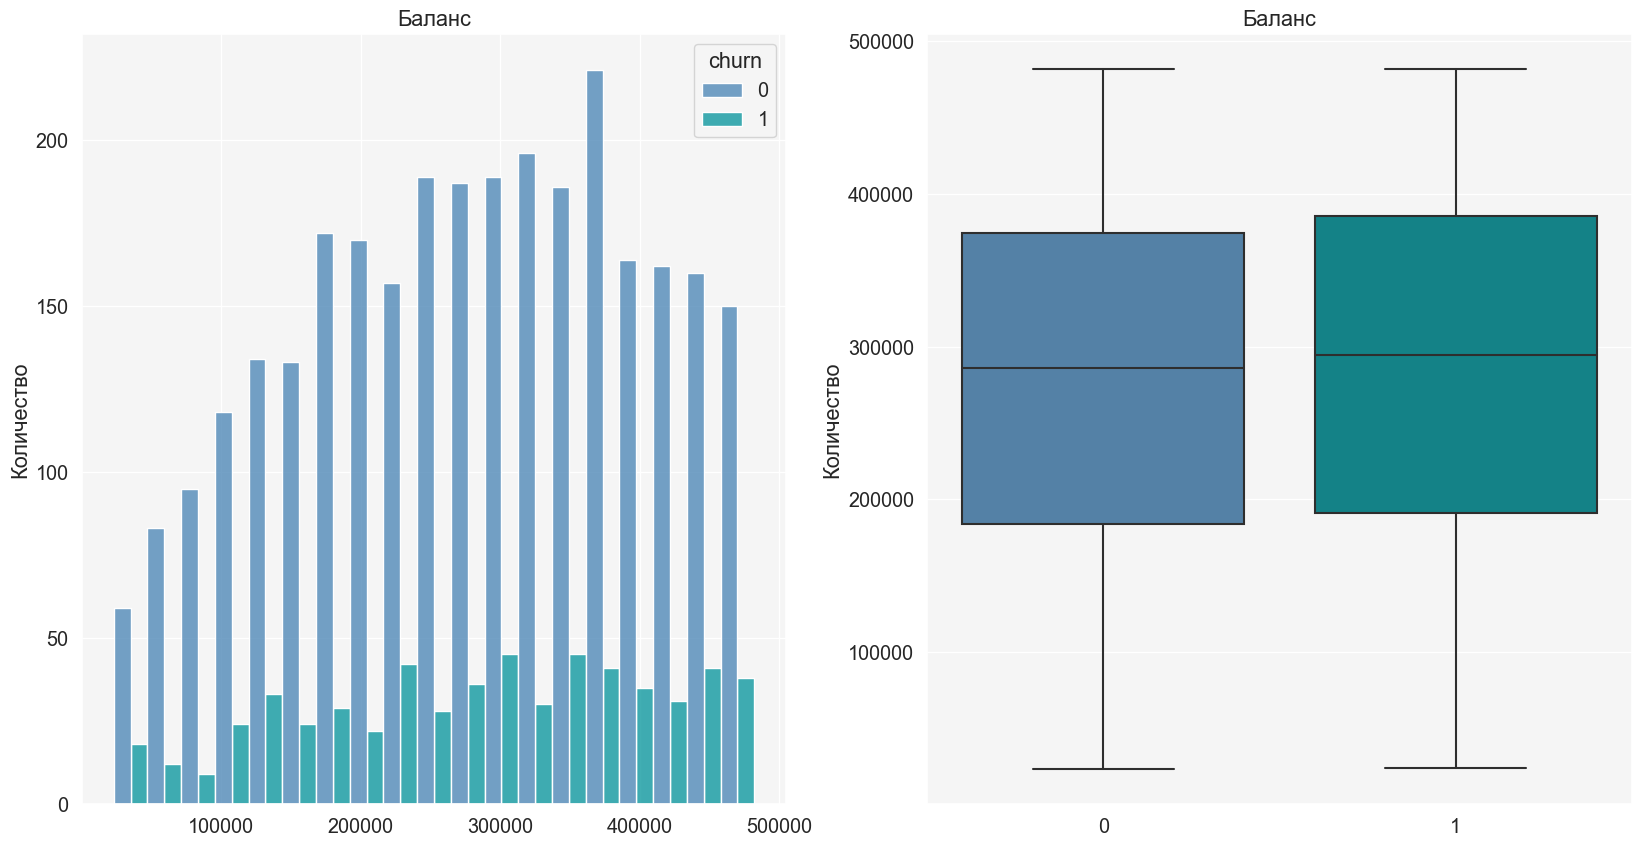

Среднее значение по уходящим клиентам 285880.41253859346
Медиана по уходящим клиентам 294367.88

Среднее значение по остальным клиентам 277261.89967863244
Медиана по остальным клиентам 285725.23


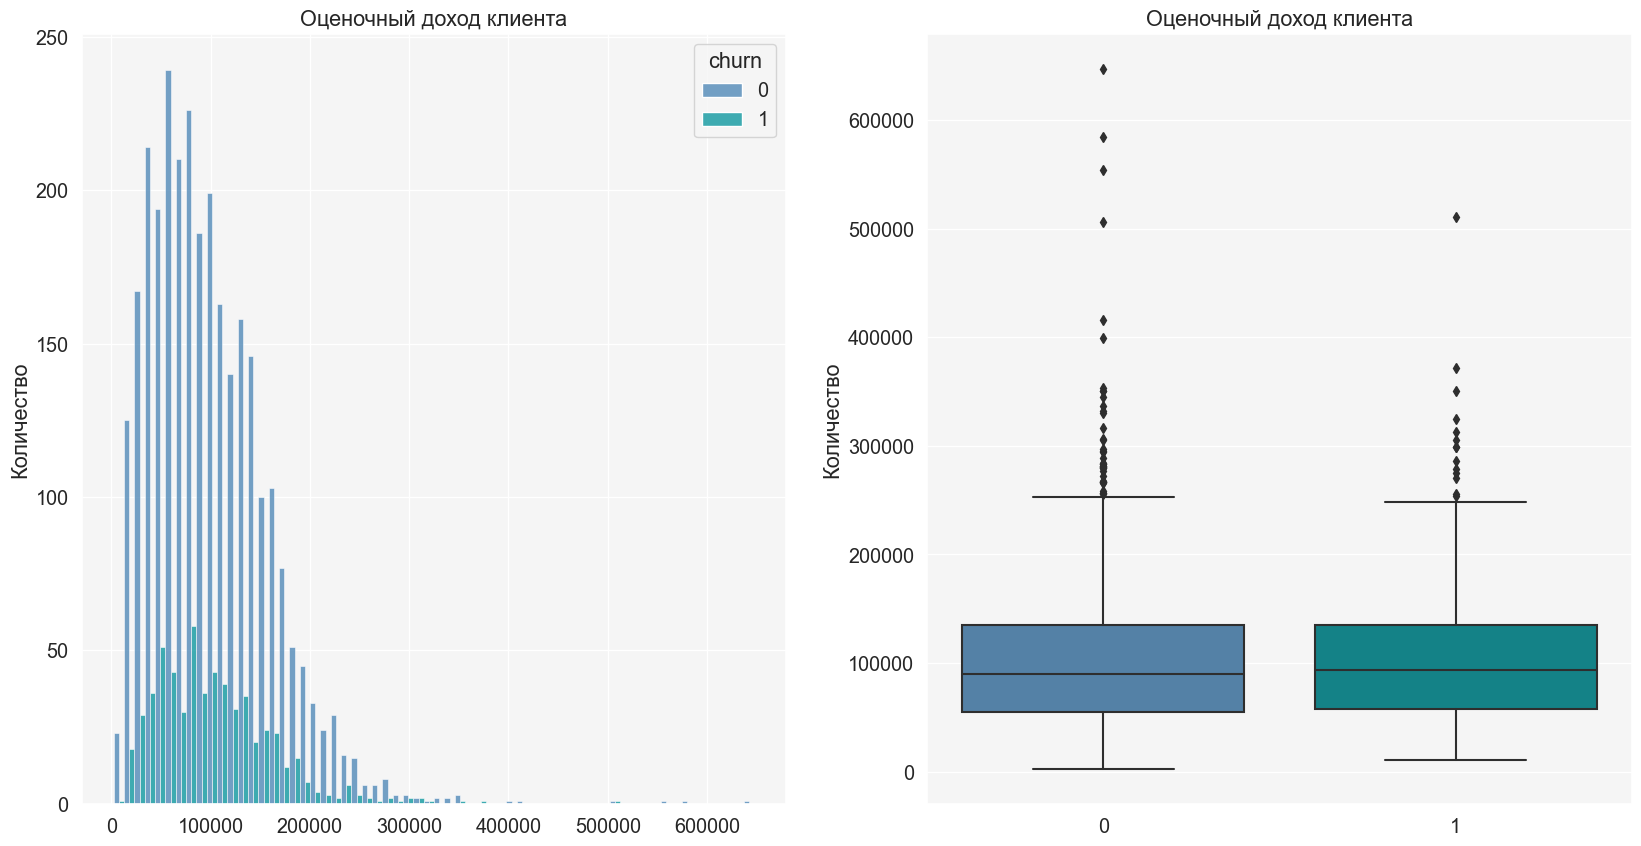

Среднее значение по уходящим клиентам 102508.29867924527
Медиана по уходящим клиентам 94036.81

Среднее значение по остальным клиентам 99187.5182905983
Медиана по остальным клиентам 89550.21


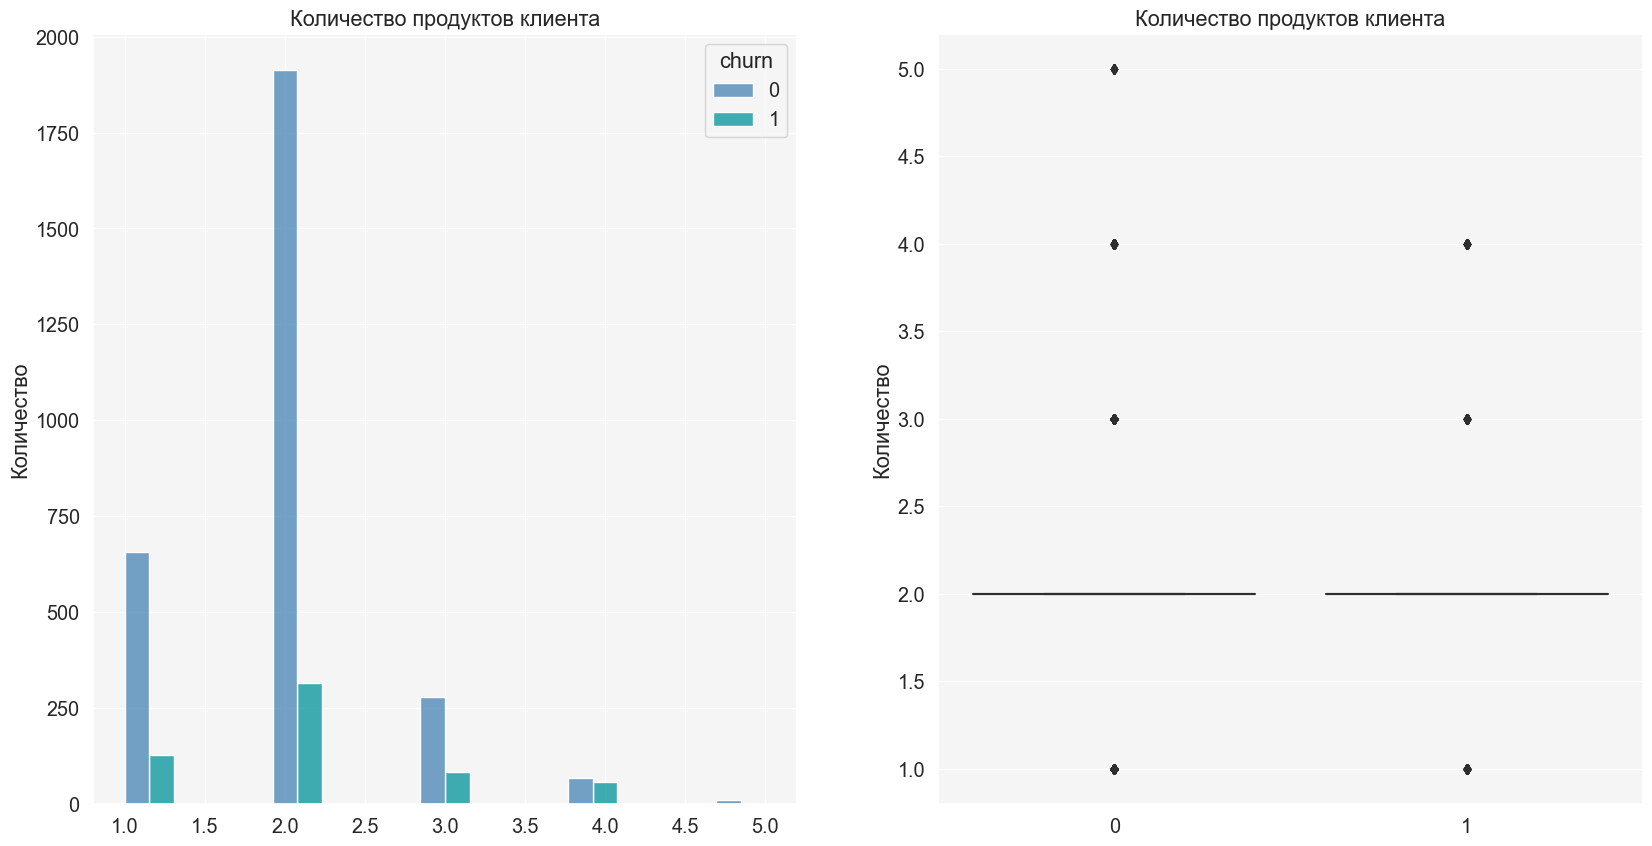

Среднее значение по уходящим клиентам 2.1252144082332762
Медиана по уходящим клиентам 2.0

Среднее значение по остальным клиентам 1.9278632478632478
Медиана по остальным клиентам 2.0


In [29]:
for i in quanti_variables.columns:
    visual_quanti(i)
    mean_med(i)

__Вывод__

Каких то критических структурных сдвигов по параметрам не видно, но есть интересные замечания, например, в среднем возраст, уходящих клиентов меньше, чем у остальных, а оценочный доход и баллы кредитного скоринга выше у уходящих, чем у остальных клиентов. 

Теперь посмотрим на качественные переменные

In [30]:
quali_variables = df[['city', 'gender', 'credit_card', 'last_activity', 'churn']]
quali_variables = (
                    quali_variables
                    .rename(columns={'city':'Город', 'gender':'Пол', 
                                     'credit_card':'Наличие кредитной карты', 
                                     'last_activity':'Активность клиента'})
                   )


In [31]:
for col in quali_variables.columns:
    if col == 'Наличие кредитной карты':
        quali_variables[col] = quali_variables[col].replace([1, 0], ['Есть', 'Нету'])
    elif col == 'Активность клиента':
        quali_variables[col] = quali_variables[col].replace([1, 0], ['Активный', 'Неактивный'])

In [32]:
def visual_quali (column):
    """
    Функция визуализирует распределение данных
    """
    if column == 'churn':
        pass
    else:
        sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(20,10)}, font_scale = 1.3)
        
        sns.countplot(data=quali_variables, x=quali_variables[column], 
                      hue=quali_variables['churn'],
                     palette=['#4682B4', '#01939A'])
        plt.ylabel('Количество')
        plt.title(column)
        plt.xlabel('')
        plt.show()

In [33]:
def prop (col, unique):
    if col == 'churn':
        pass
    else:
        a = len(quali_variables.loc[(quali_variables[col] == unique) & (quali_variables['churn'] == 1)])
        b = len(quali_variables.loc[(quali_variables[col] == unique) & (quali_variables['churn'] == 0)])
        print('Доля оттока', unique, '{:.2%}'.format(a/(a+b))) 
        print('Доля остальных', unique, '{:.2%}'.format(b/(a+b)))
        print()

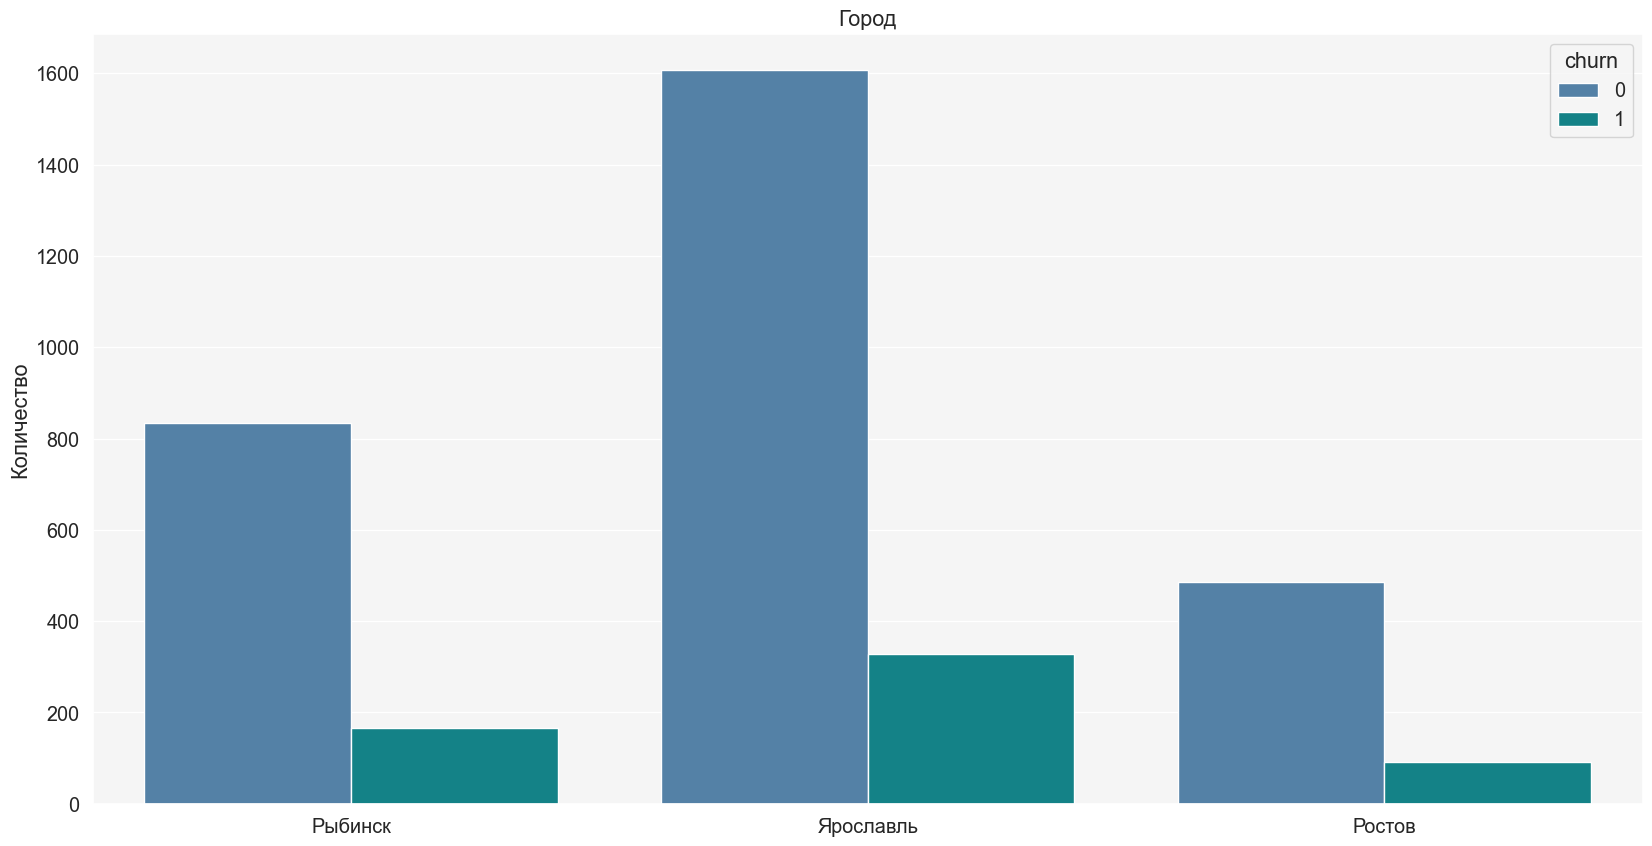

Доля оттока Рыбинск 16.52%
Доля остальных Рыбинск 83.48%

Доля оттока Ярославль 16.92%
Доля остальных Ярославль 83.08%

Доля оттока Ростов 15.80%
Доля остальных Ростов 84.20%



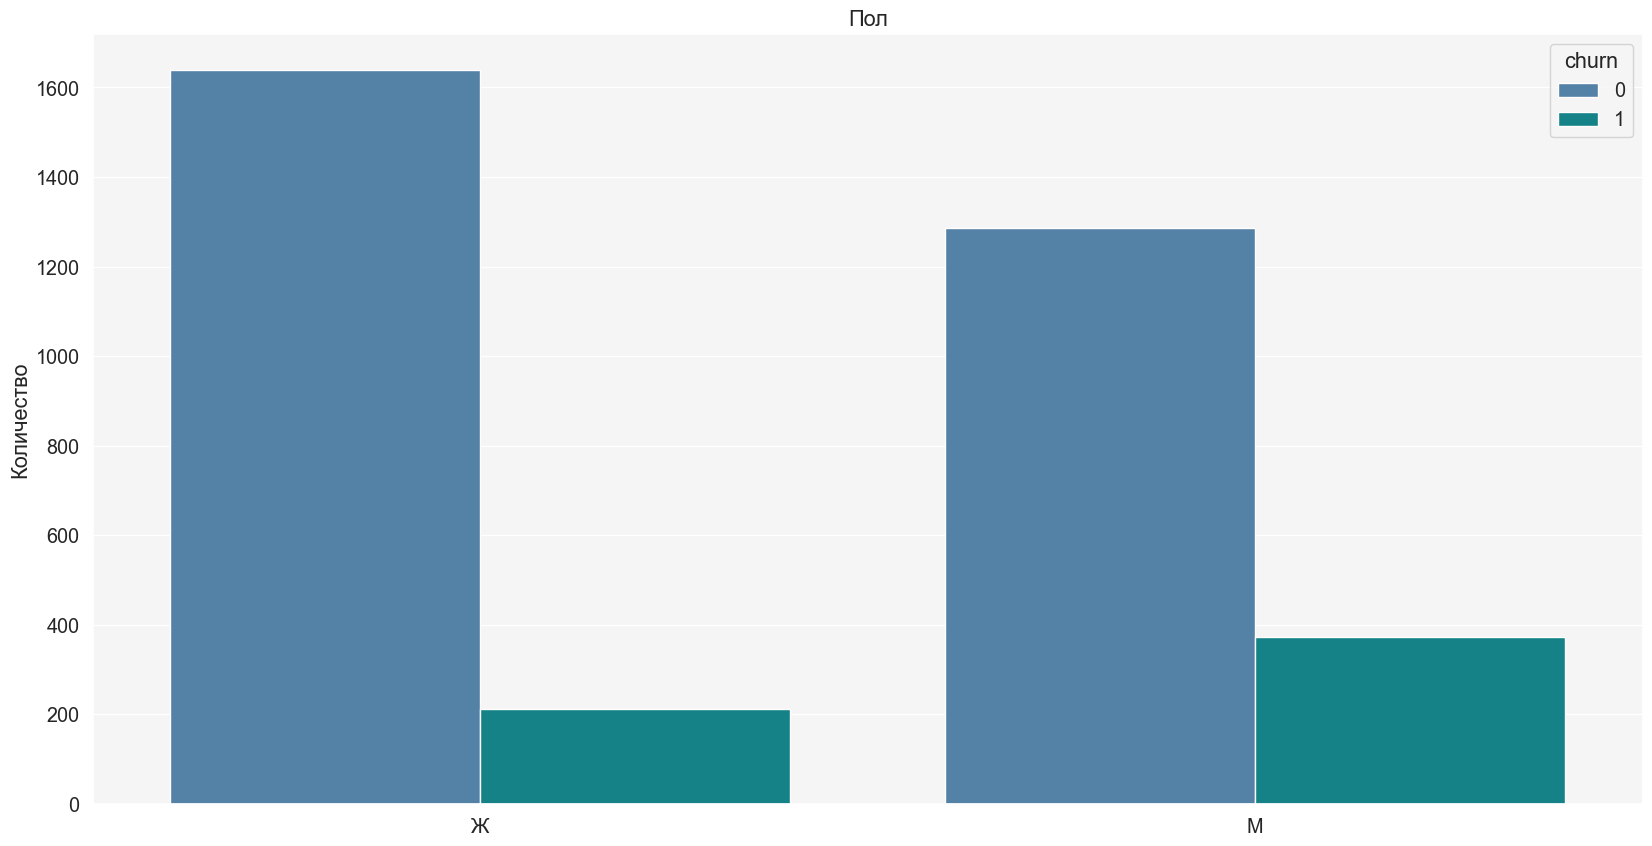

Доля оттока Ж 11.41%
Доля остальных Ж 88.59%

Доля оттока М 22.42%
Доля остальных М 77.58%



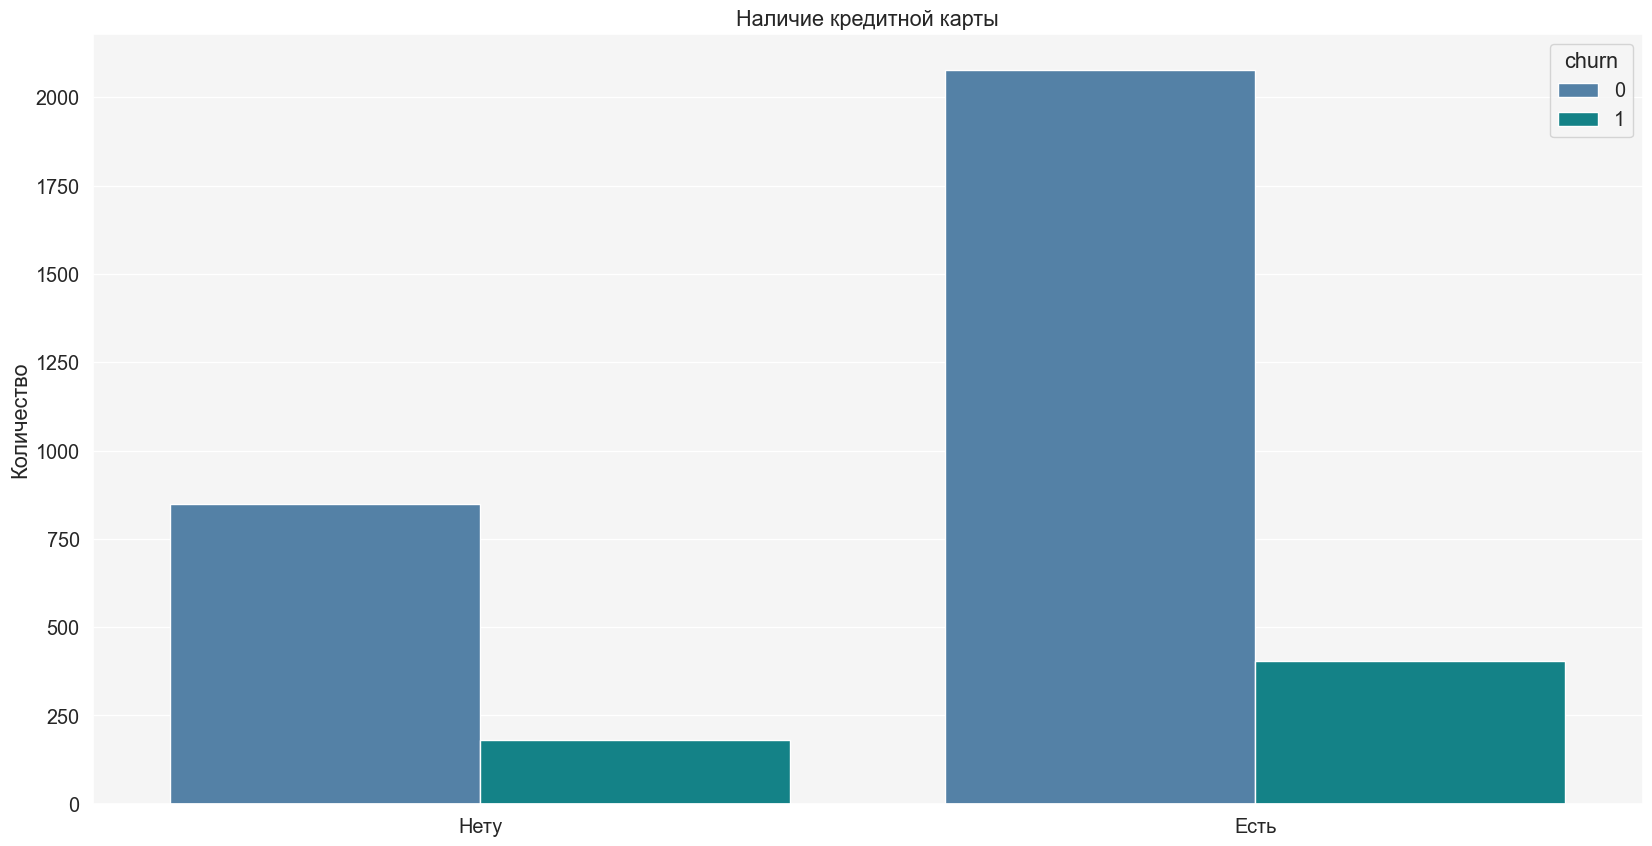

Доля оттока Нету 17.49%
Доля остальных Нету 82.51%

Доля оттока Есть 16.26%
Доля остальных Есть 83.74%



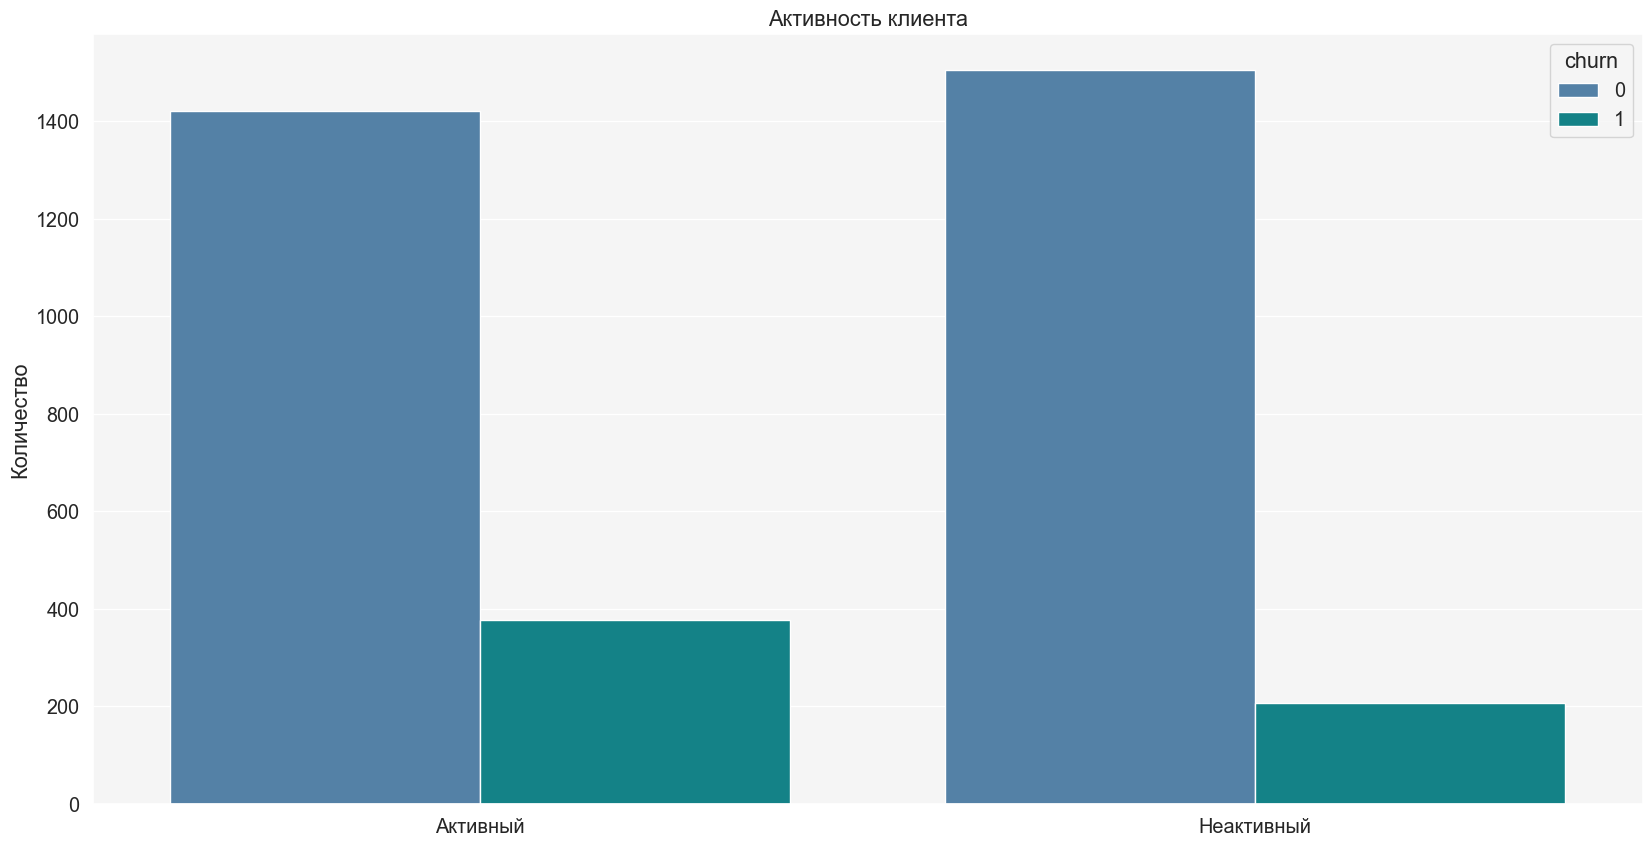

Доля оттока Активный 20.92%
Доля остальных Активный 79.08%

Доля оттока Неактивный 12.10%
Доля остальных Неактивный 87.90%



In [34]:
for col in quali_variables.columns:
    visual_quali(col)
    for i in quali_variables[col].unique():
        prop(col, i)

__Выводы__

Рассмотрели качественные переменные. Доля мужчин в числе решивших покинуть банк больше, чем среди оставшихся клиентов, также среди уходящих клиентов большая доля активных клиентов.

### Проверка гипотез

Мы выделили несколько гипотез:

- В среднем возраст у уходящих клиентов меньше чем у остальных
- Кредитный скоринг выше у уходящих клиентов чем у остальных
- Оценочный дохож клиентов решивших уйти больше чем у оставшихся

Проверять гипотезы будем на 5% уровне статистической значимости

$H_0$ :Средний возраст среди уходящих клиентов равен среднему возрасту остальных клиентов

$H_1$ :Средний возраст среди уходящих клиентов меньше чем средний возраст остальных клиентов

In [35]:
alpha = 0.05
result_1 = st.ttest_ind(df.query('churn == 1')['age'], 
                        df.query('churn == 0')['age'], alternative='less')

if result_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_1.pvalue)

Отвергаем нулевую гипотезу
p-значение 0.0022580399488867017


$H_0$ :Средний кредитный скоринг уходящих клиентов равен среднему кредитному скорингу остальных клиентов

$H_1$ :Cредний кредитный скоринг у уходящих клиентов больше чем у остальных

In [36]:
result_2 = st.ttest_ind(df.query('churn == 1')['score'], 
                        df.query('churn == 0')['score'], alternative='greater')

if result_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_2.pvalue)

Отвергаем нулевую гипотезу
p-значение 8.681428508004437e-10


$H_0$ :Средний оценочный доход уходящих клиентов равен среднему оценочному доходу остальных клиентов

$H_1$ :Средний оценочный доход уходящих клиентов больше чем средний оценочный доход остальных клиентов

In [37]:
result_3 = st.ttest_ind(df.query('churn == 1')['est_salary'], 
                        df.query('churn == 0')['est_salary'], alternative='greater')

if result_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_3.pvalue)

Не получилось отвергнуть нулевую гипотезу
p-значение 0.11121585210106574


__Промежуточный вывод__


Мы провели предобработку данных, исследовательский анализ и статистические тесты.

В ходе исследовательского анализа выявили несколько особенностей:

Среди уходящих клиентов, средний возраст меньше, чем у остальных клиентов банка, а оценочный доход и баллы кредитного скоринга больше.

Статистические тесты подтвердили гипотезы о разнице в возрасте и кредитном скоринге между уходящими и остальными клиентами.

Также в анализе качественных переменных выяснилось, что основная часть уходящих клиентов это мужчины, которые являются активными клиентами банка.

Теперь перейдем к задаче кластеризации.

### Кластеризация клиентов

In [38]:
cluster = pd.get_dummies(df)

In [39]:
cluster = cluster.drop(['city_Ярославль', 'gender_Ж', 'user_id'], axis=1)


In [40]:
sc = StandardScaler()
x_sc = sc.fit_transform(cluster)

In [41]:
linked = linkage(x_sc, method = 'ward')

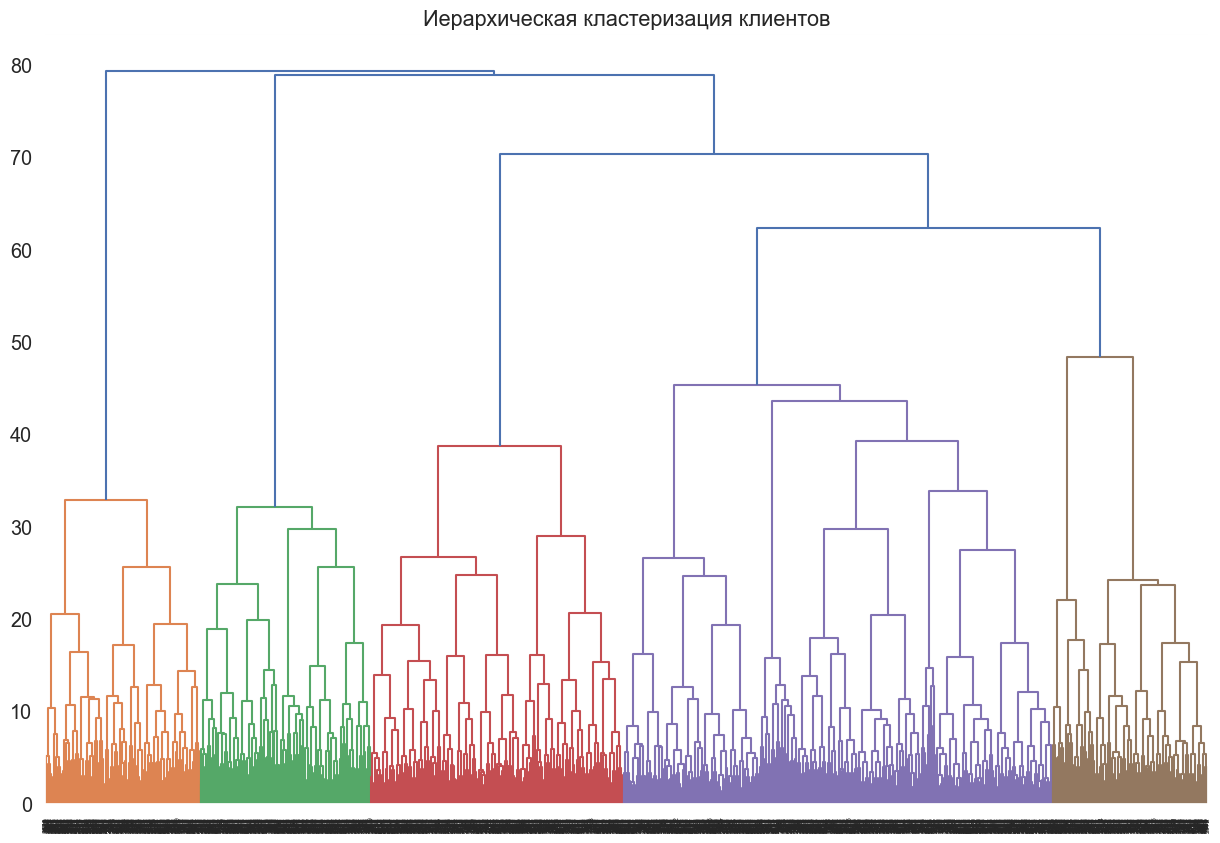

In [42]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.show() 

Метод иерархической кластеризации предлагает разделить клиентов на 5 кластеров, дополнительно проверим количество кластеров "методом локтя"

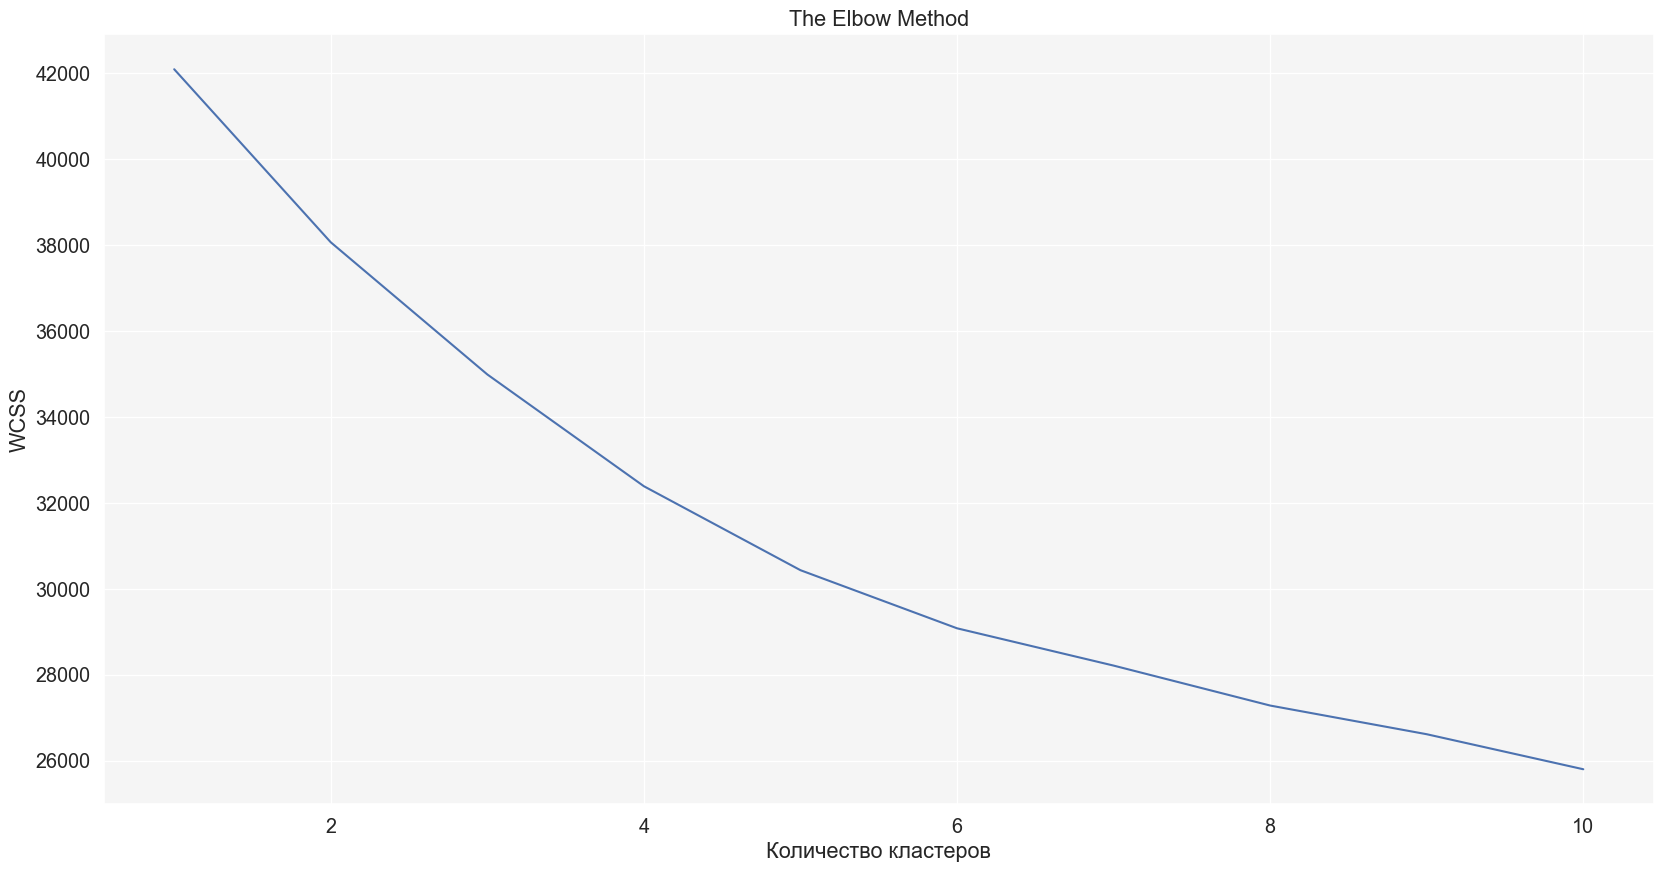

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

5 кластеров самое то

Применим алгоритм k-means с числом кластеров 5

In [44]:
km = KMeans(n_clusters=5, random_state=0)

In [45]:
labels = km.fit_predict(x_sc)

In [46]:
cluster.head()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,gender_М
0,850.00,25.00,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0
6,807.00,39.00,3,"405,042.44",3,0,1,"103,838.32",0,0,0,0
7,825.00,38.00,4,"458,145.40",2,1,1,"68,085.48",0,0,0,0
13,837.00,28.00,4,"302,249.22",2,0,1,"30,950.94",0,0,1,0
23,732.00,48.00,2,"163,725.37",2,0,1,"133,528.02",0,0,0,0


In [48]:
cluster['cluster_km'] = labels

In [49]:
cluster.groupby(by='cluster_km').mean()

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,gender_М
cluster_km,,,,,,,,,,,,
0,819.56,42.68,2.53,"280,631.58",1.92,0.59,0.51,"89,446.73",0.10,1.00,0.00,0.43
1,838.69,39.56,2.89,"293,099.77",2.18,0.70,0.67,"104,563.49",1.00,0.07,0.32,0.65
2,826.46,44.03,2.67,"303,825.65",2.28,0.00,0.49,"100,728.86",0.00,0.00,0.44,0.28
3,811.81,37.78,1.38,"162,190.90",1.76,0.97,0.47,"106,433.68",0.01,0.00,0.29,0.60
4,832.29,42.14,3.31,"354,111.40",1.83,1.00,0.48,"96,489.26",0.00,0.00,0.32,0.42


__Вывод__

Очень интересный получился кластер под номером 1, он характеризует среднего клиента, желающим покинуть банк. 

Судя по нему можно сказать, что в основном это мужчины младше 40 лет, преимущественно из Ярославля, которые были активными клиентами банка и имеющим кредитную карту. В среднем у них больше 2-х банковских продукта, а также, имеющие средний балл кредитного скоринга.

### Выводы и рекомендации

В ходе исследования мы выяснили те значения переменных, которые в среднем характерны для клиентов оттока.

Мужчины младше 40, преимущественно из Ярославля со средним баллом кредитного скоринга и имеющие более 2-х продуктов банка и кредитную карту. Они также являются активными пользователями.

На основе перечисленных характеристик, в особенности географической зависимости, можно предположить, что клиенты банка уходят из-за появления новых, более выгодных банковских продуктов у банков-конкурентов. 

На основе имеющихся данных, можно порекомендовать следующее:

- Провести анализ конкурентов, выявить их сильные и слабые стороны;
- Пересмотреть условия предоставления имеющихся банковских продуктов и сделать их более конкурентноспособными;
- Следует обратить внимание на офисы расположенные в г.Ярославль, найти причину того, что большая часть клиентов оттока именно оттуда.